In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display, HTML, display_html
import datetime

Predicting the number of crimes for the next day for the entire city. The next step is to predict the reporting areas with the highest predicted number of crime for a day in the future.

In [3]:
crime_short = pd.read_csv('crime_short.csv')

In [4]:
crime_short.head()

,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR
0,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,717,0,2019-04-14 16:00:00,2019,4,Sunday,16
1,3410,Towed,TOWED MOTOR VEHICLE,340,0,2019-04-16 20:25:00,2019,4,Tuesday,20
2,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,459,0,2019-04-16 20:57:00,2019,4,Tuesday,20
3,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,291,0,2019-04-16 20:52:00,2019,4,Tuesday,20
4,802,Simple Assault,ASSAULT SIMPLE - BATTERY,291,0,2019-04-16 20:52:00,2019,4,Tuesday,20


In [5]:
crime_short['OCCURRED_ON_DATE'] = pd.to_datetime(crime_short['OCCURRED_ON_DATE'])

In [6]:
crime_short['DATE'] = crime_short['OCCURRED_ON_DATE'].apply(lambda date:date.date())

In [7]:
crime_time_series = crime_short.groupby('DATE').count()['OFFENSE_CODE']

Will take DAY_OF_WEEK, REPORTING_AREA, and OFFENSE_CODE as features for the crime_time_series (group into a crime_time_frame)

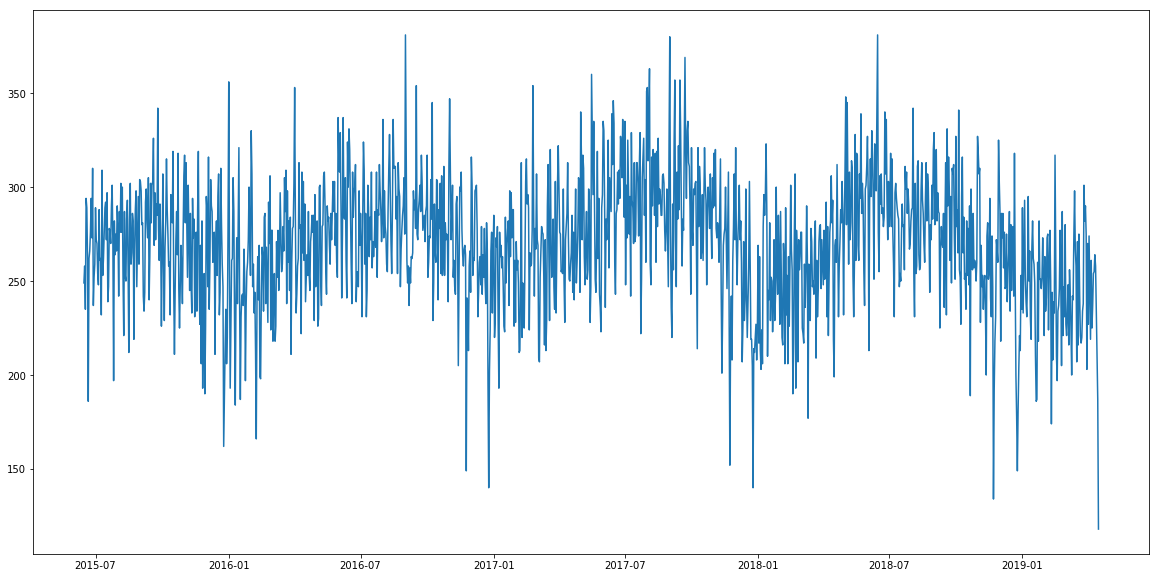

In [8]:
# plot out crime_time_series to see the overall trend
fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(crime_time_series)

The time series seems to be stationary and there is a clear seasonality here

In [9]:
!pip install keras

In [10]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Flatten

Using TensorFlow backend.


In [11]:
# normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

crime_time_series = scaler.fit_transform(np.array(crime_time_series).reshape(-1, 1))

/Users/lamvo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
# split crime_time_series to train, val, and test
train = crime_time_series[:len(crime_time_series)*80//100]
val = crime_time_series[len(crime_time_series)*80//100:len(crime_time_series)*90//100]
test = crime_time_series[len(crime_time_series)*90//100:]

In [13]:
train.shape

(1121, 1)

In [14]:
window = 7
features = []
labels = []
for i in range(7, len(train)):
    features.append(train[i - window: i])   
    labels.append(train[i])    

In [15]:
features = np.array(features)
labels = np.array(labels)

In [16]:
model = Sequential()
# model.add(LSTM(units = 50, return_sequences = True, input_shape = (features.shape[1], 1)))
# model.add(Dropout(0.2))
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
model.fit(features, labels, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1114/1114 [==============================] - 1s 680us/step - loss: 0.0519
Epoch 2/100
1114/1114 [==============================] - 0s 52us/step - loss: 0.0506
Epoch 3/100
1114/1114 [==============================] - 0s 57us/step - loss: 0.0494
Epoch 4/100
1114/1114 [==============================] - 0s 53us/step - loss: 0.0481
Epoch 5/100
1114/1114 [==============================] - 0s 55us/step - loss: 0.0469
Epoch 6/100
1114/1114 [==============================] - 0s 53us/step - loss: 0.0458
Epoch 7/100
1114/1114 [==============================] - 0s 56us/step - loss: 0.0446
Epoch 8/100
1114/1114 [==============================] - 0s 55us/step - loss: 0.0435
Epoch 9/100
1114/1114 [==============================] - 0s 50us/step - loss: 0.0424
Epoch 10/100
1114/1114 [==============================] - 0s 54us/step - loss: 0.0414
Epoch 11/100
1114/1114 [==============================] - 0s 48us/step - loss: 0.0403
Epoch 12/100
1

1114/1114 [==============================] - 0s 54us/step - loss: 0.0136
Epoch 94/100
1114/1114 [==============================] - 0s 52us/step - loss: 0.0135
Epoch 95/100
1114/1114 [==============================] - 0s 48us/step - loss: 0.0136
Epoch 96/100
1114/1114 [==============================] - 0s 45us/step - loss: 0.0135
Epoch 97/100
1114/1114 [==============================] - 0s 46us/step - loss: 0.0135
Epoch 98/100
1114/1114 [==============================] - 0s 45us/step - loss: 0.0134
Epoch 99/100
1114/1114 [==============================] - 0s 45us/step - loss: 0.0134
Epoch 100/100
1114/1114 [==============================] - 0s 46us/step - loss: 0.0134


In [24]:
crime_short['OFFENSE_CODE_GROUP'].nunique()

67